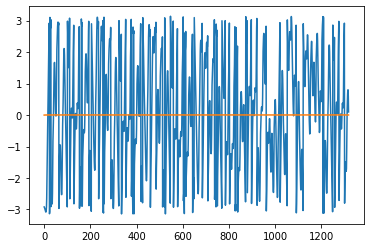

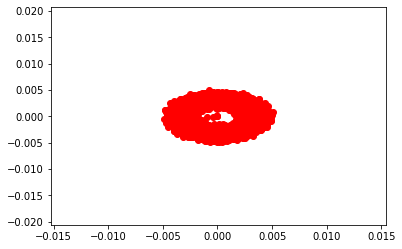

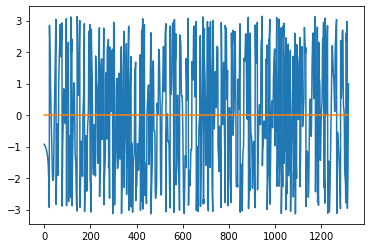

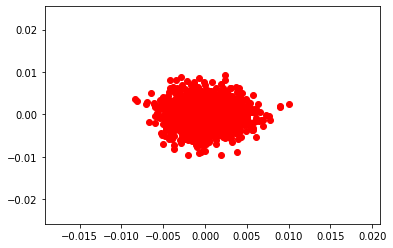

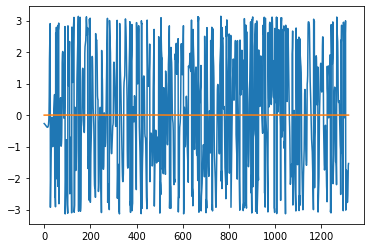

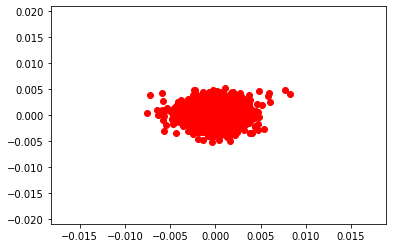

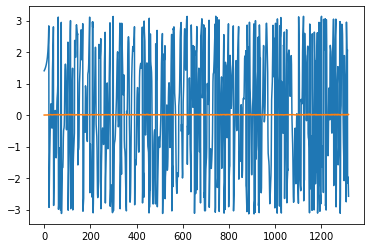

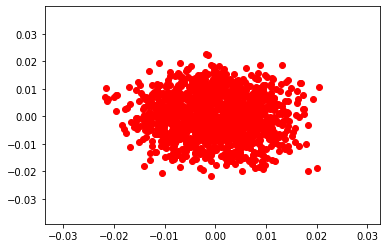

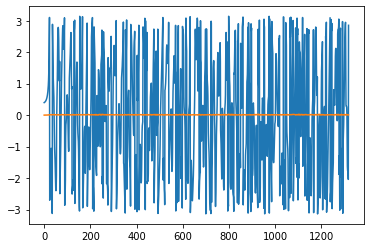

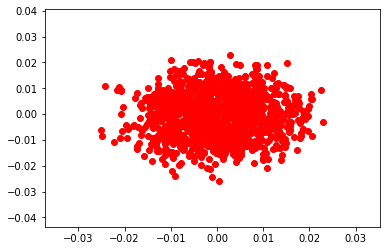

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import spline

'''
Read IQ file from Morgan State University and convert values to Python complex numbers

Author: Tim Pierson and Manzi Bryan, June 2019

To use, go to line 36 and enter pathway to folder with all 5 bursts of iq data

input: directory with burst files

output: one excel sheet with all the iq data called iq.xlsx
'''

numBursts = 5

def convert_to_complex(val):
    #input expected to be a string in form: -4.618764e-07 - 1.047144e-07i
    #the first part is the real component, note there are spaces around the sign for the second (imaginary) number,
    #so a split on just a space, would return 3 values, limit split to only split one time (e.g., only create two strings)
    #remove "i" from string and split real and imaginary parts
    complex_list = val.replace('i','').split(" ",1) #real part is at index 0, imaginary at index 1 thanks to limiit split to 1
    r = float(complex_list[0])  #extract real part and convert to a float
    i = float(complex_list[1].replace(" ","")) #remove the space between the sign and number for imaginary and convert to float
    return complex(r,i) #complex takes two floats, real and imaginary, and creates a complex number, return that complex number


if __name__ == '__main__':
    #read IQ data files
    allbursts = []
    i = 1
    
    df = pd.DataFrame()
    
    while i <= numBursts:
    
        data = pd.read_excel(r'C:\Users\brnma\iqdata\Burst ' + str(i) + ' ROI.xlsx') 

        #loop through all columns and convert values to Python complex nubmers
        for column_name in data.columns:
            data[column_name] = data[column_name].apply(convert_to_complex)

        df = df.append(data)
        i+=1
        
#         print(df)

        #grab Samsung Hub1 and plot phase and amplitude
        #we'll need to determine the sampling rate the capture device uses
        sam = data[' Samsung Hub1']

        #get and plot phase
        phase = np.angle(sam)
#         print(phase)
        plt.plot(phase)
#         plt.show()

        #get and plot amplitude (should be fairly constant, except for noise)
        amp = np.abs(sam)
#         print(amp)
        plt.plot(amp)
        plt.show()

        X = [x.real for x in sam]
        Y = [x.imag for x in sam]
        plt.scatter(X,Y, color='red')
        plt.show()
    df.to_excel('iq.xlsx')  # doctest: +SKIP
    

